核酸检测nucleic acid testing中的排队问题
Compute the following performance measures through simulation:
• The average time a tester waits in queue=1/30*(W1+...+W30)
• no tester in the sysytem p0=emptytime/total time, Lq=
• The average utilization of the staff. 

Monte Carlo Simulation
Step1:Generate random numbers with certain distributions
Step2: Simulate stochastic process

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#units:Minutes 
arrivingtime = np.random.poisson(lam=30,size = 30)# 假设大家下楼到检测点的平均时间为5分钟, 生成30个人arriving time
arrivingtime.sort()---这里应该删掉, 每一个人的到来随机的我们不需要排序
print(arrivingtime)
workingtime = np.random.poisson(lam=3,size = 30)# 平均2分钟做一个人
print(workingtime)#arrivingtime,servicetime都print出来，收集到excel表格里面

[21 32 35 29 38 21 34 31 28 41 29 27 26 28 24 32 27 38 46 34 32 31 40 30
 37 28 28 41 30 32]
[3 1 5 2 2 4 1 1 2 0 4 2 4 1 5 6 1 5 1 2 3 1 4 1 2 1 4 4 3 1]


‼️收集方式：复制数据到excel，在数据栏选择分列，这样是行的方式呈现，所以再选中这行数，选择要放置数据列中的第一个单元格，右键选择性粘贴中的转置

In [42]:
#只有一个检测点 M/M/1/∞
startingtime = [0 for i in range(30)]
finishtime = [0 for i in range(30)]
waitingtime = [0 for i in range(30)]
emptytime = [0 for i in range(30)]

# 第一个人到达即开始
startingtime[0] = arrivingtime[0]  # 第一个人之前没有人，所以开始时间 = 到达时间
finishtime[0] = startingtime[0] + workingtime[0]   # 第一个人完成时间 = 开始时间 + “工作”时间
waitingtime[0] = startingtime[0]-arrivingtime[0]   # 第一个人不用等待


between 0 and 1 the empty time is: 8
between 1 and 2 the empty time is: 2
average waiting time is 35.600000
total empty time is:  10


Text(0.5, 1.0, 'Monte Carlo-Nucleic acid test-1 ')

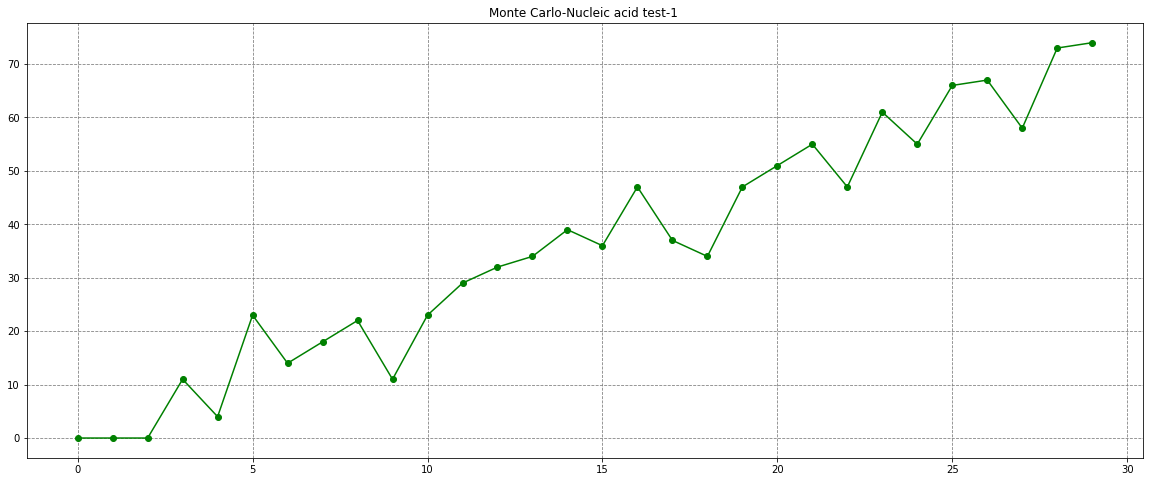

In [43]:
totalempty=0 #initialtion
for i in range(1,len(arrivingtime)):
    if finishtime[i-1] > arrivingtime[i]:
        startingtime[i] = finishtime[i-1]#the system is busy,产生waiting time
    else:
        startingtime[i] = arrivingtime[i]#the system is idle, 产生空缺时间用于计算利用率=1-总空缺时间/总时间
        emptytime[i] = arrivingtime[i] - finishtime[i-1]#i 产生的空缺时间
        print('between',i-1,'and',i,'the empty time is:',emptytime[i])
        totalempty=totalempty+emptytime[i]# 总空缺时间
    finishtime[i] = startingtime[i] + workingtime[i]
    waitingtime[i] = startingtime[i] - arrivingtime[i]# 等待时间=开始做核酸的时间-到来的时间
print('average waiting time is %f' %np.mean(waitingtime))
print('total empty time is: ',totalempty)

fig = plt.figure(figsize = (20,8))
plt.plot(waitingtime, '-go')
plt.grid(True,linestyle='--', color = 'gray',linewidth = 0.8)
plt.title('Monte Carlo-Nucleic acid test-1 ')

Average waiting time： 18.933333333333334


Text(0.5, 1.0, 'Monte Carlo-Nucleic acid test-2 ')

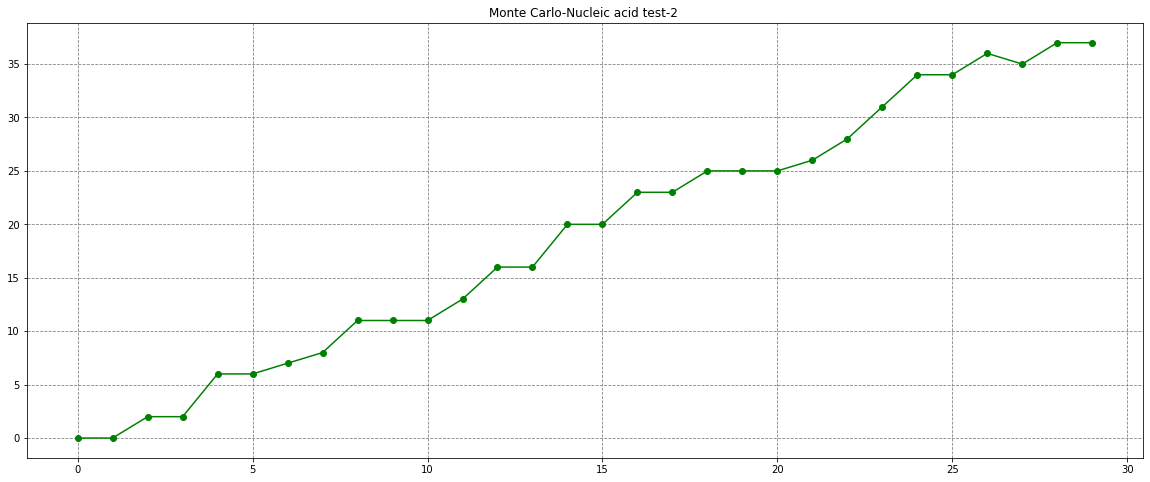

In [8]:
#又引入了一个检测点 需要考虑前两个人的情况
startingtime[1] = arrivingtime[1]
finishtime[1] = startingtime[1] + workingtime[1] 
waitingtime[1] = startingtime[1] - arrivingtime[1]

for i in range(2,len(arrivingtime)):
    if finishtime[i-1] > arrivingtime[i] and finishtime[i-2] > arrivingtime[i]:
        startingtime[i] = min(finishtime[i-1],finishtime[i-2])
    else:
        startingtime[i] = arrivingtime[i]
        emptytime[i] = arrivingtime[i] - min(finishtime[i-1],finishtime[i-2])
    finishtime[i] = startingtime[i] + workingtime[i]
    waitingtime[i] = startingtime[i] - arrivingtime[i]
print('Average waiting time：', np.mean(waitingtime))

fig = plt.figure(figsize = (20,8))
plt.plot(waitingtime, '-go')
plt.grid(True,linestyle='--', color = 'gray',linewidth = 0.8)
plt.title('Monte Carlo-Nucleic acid test-2 ')

Average waiting time： 4.2


Text(0.5, 1.0, 'Monte Carlo-Nucleic acid test-3 ')

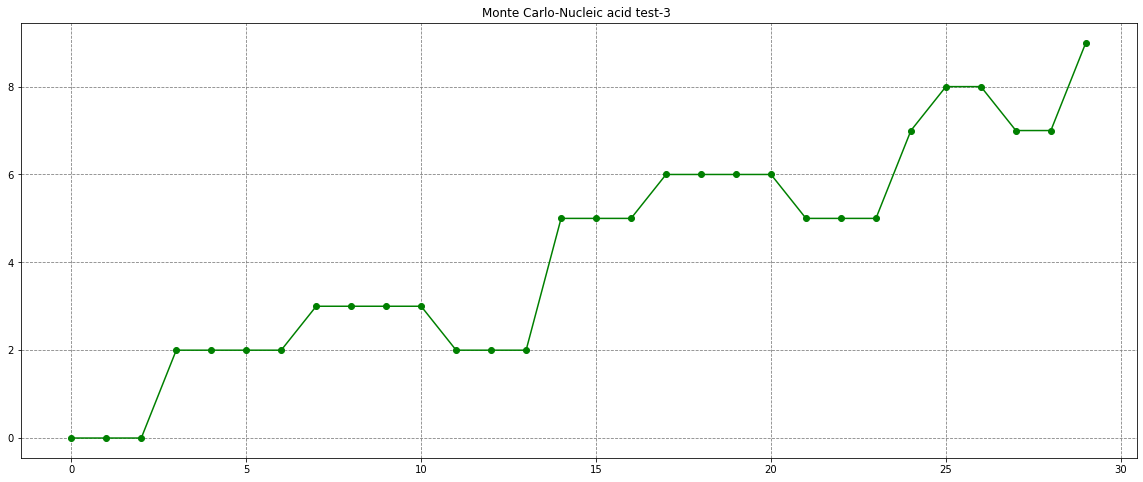

In [9]:
#增加到三个监测点
#需要考虑前三个人的情况
startingtime[2] = arrivingtime[2]
finishtime[2] = startingtime[2] + workingtime[2] 
waitingtime[2] = startingtime[2] - arrivingtime[2]

for i in range(3,len(arrivingtime)):
    if finishtime[i-1] > arrivingtime[i] and finishtime[i-2] > arrivingtime[i] and finishtime[i-3] > arrivingtime[i] and finishtime[i-4] > arrivingtime[i] and finishtime[i-5] > arrivingtime[i]:
        startingtime[i] = min(finishtime[i-1],finishtime[i-2],finishtime[i-3],finishtime[i-4],finishtime[i-5])
    else:
        startingtime[i] = arrivingtime[i]
        emptytime[i] = arrivingtime[i] - min(finishtime[i-1],finishtime[i-2],finishtime[i-3],finishtime[i-4],finishtime[i-5])
    finishtime[i] = startingtime[i] + workingtime[i]
    waitingtime[i] = startingtime[i] - arrivingtime[i]
print('Average waiting time：', np.mean(waitingtime))


fig = plt.figure(figsize = (20,8))
plt.plot(waitingtime, '-go')
plt.grid(True,linestyle='--', color = 'gray',linewidth = 0.8)
plt.title('Monte Carlo-Nucleic acid test-3 ')